# What makes a good candy?

Import libraries and get the data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'
df = pd.read_csv(url, index_col=0)
df.dataframeName = 'candies'

Display head of the data set, show main characteristics.

In [2]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
display(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


## Correlation matrix
Uncover correlations between features.

<AxesSubplot:>

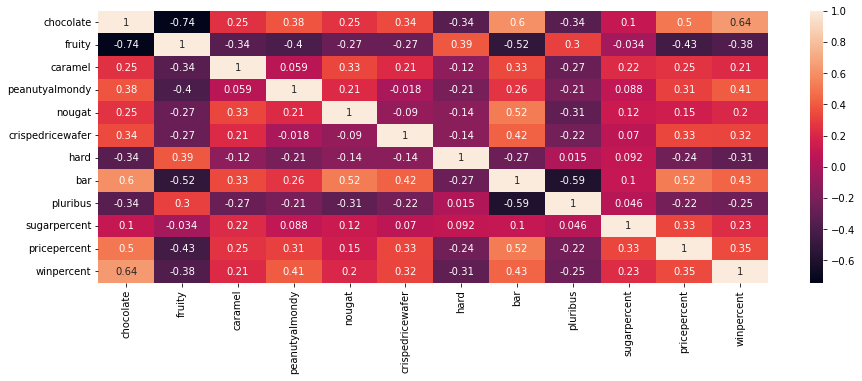

In [4]:
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

## Frequent combinations in the data set (using all features)

In [5]:
from mlxtend.frequent_patterns import apriori

assoc_rules_df = df[df.columns[0:-3]]
frequent_combinations = apriori(assoc_rules_df, min_support=0.05, use_colnames=True)

frequent_combinations['length'] = frequent_combinations['itemsets'].apply(lambda x: len(x))
frequent_combinations = frequent_combinations[frequent_combinations['length'] > 1].sort_values(by='support',ascending=False)
print(frequent_combinations)

     support                            itemsets  length
16  0.305882                  (fruity, pluribus)       2
13  0.235294                    (bar, chocolate)       2
15  0.152941                      (hard, fruity)       2
14  0.141176               (pluribus, chocolate)       2
10  0.141176         (peanutyalmondy, chocolate)       2
9   0.117647                (caramel, chocolate)       2
22  0.094118           (caramel, bar, chocolate)       3
21  0.094118                    (hard, pluribus)       2
17  0.094118                      (caramel, bar)       2
19  0.082353                       (nougat, bar)       2
18  0.082353               (peanutyalmondy, bar)       2
12  0.082353       (crispedricewafer, chocolate)       2
26  0.082353            (hard, fruity, pluribus)       3
20  0.070588             (crispedricewafer, bar)       2
11  0.070588                 (nougat, chocolate)       2
23  0.070588    (bar, peanutyalmondy, chocolate)       3
24  0.070588            (bar, n

## Linear regression (sugar vs. popularity)

Spearman correlation among sugar percentage and win percentage is 0.21793714494295427 with p value = 0.04510378936481295.


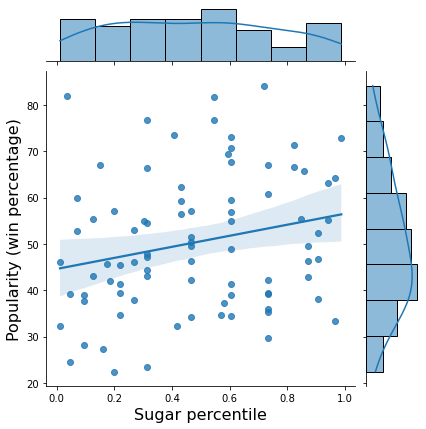

In [6]:
from scipy.stats import spearmanr
join_plot = sb.jointplot(x='sugarpercent', y='winpercent', kind='reg', data=df)
join_plot.set_axis_labels('Sugar percentile', 'Popularity (win percentage)', fontsize=16)
rho, pval = spearmanr(df['sugarpercent'], df['winpercent'])
print('Spearman correlation among sugar percentage and win percentage is {0} with p value = {1}.'.format(rho,pval))

## Linear regression (price vs. popularity)

Spearman correlation among price percentage and win percentage is 0.35274923504075195 with p value = 0.0009291200306824364.


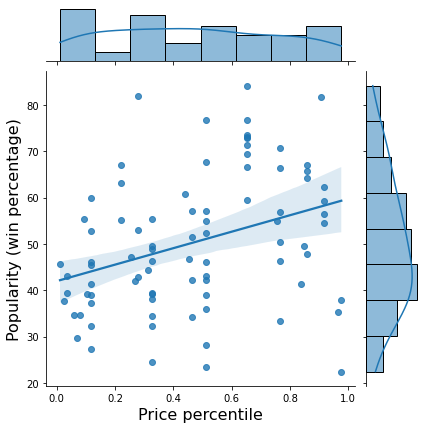

In [7]:
join_plot = sb.jointplot(x='pricepercent', y='winpercent', kind='reg', data=df)
join_plot.set_axis_labels('Price percentile', 'Popularity (win percentage)', fontsize=16)
rho, pval = spearmanr(df['pricepercent'], df['winpercent'])
print('Spearman correlation among price percentage and win percentage is {0} with p value = {1}.'.format(rho,pval))

## Multilinear regression model for categorical features

In [8]:
from sklearn import linear_model
X = df[df.columns[:-3]] 
y = df[df.columns[-1]]

import statsmodels.api as sm
X_sm = sm.add_constant(X)
ls=sm.OLS(y,X_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.842
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           6.05e-09
Time:                        20:41:12   Log-Likelihood:                -317.92
No. Observations:                  85   AIC:                             655.8
Df Residuals:                      75   BIC:                             680.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.0155      4.078  

C:\Users\jzarsky\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Removal of insignificant parameters

In [9]:
# remove columns with regression p value > 0.1
df.drop(['caramel','nougat','hard','bar','pluribus'], axis=1, inplace=True)

## Frequent combinations in the data set (using only significant features)

In [10]:
from mlxtend.frequent_patterns import apriori

assoc_rules_df = df[df.columns[0:-3]]
frequent_combinations = apriori(assoc_rules_df, min_support=0.05, use_colnames=True)

frequent_combinations['length'] = frequent_combinations['itemsets'].apply(lambda x: len(x))
frequent_combinations = frequent_combinations[frequent_combinations['length'] > 1].sort_values(by='support',ascending=False)
print(frequent_combinations)

    support                       itemsets  length
4  0.141176    (peanutyalmondy, chocolate)       2
5  0.082353  (crispedricewafer, chocolate)       2


## Hypotheses generating and testing
The function `t_test_hypothesis()` is used to compute pair t-test for two data sets of win percentages (popularity).

Then there are two iterations calling this function:
1. First iteration checks individual characteristics and their impact on win percentage (popularity).
2. First iteration checks combinations of characteristics and their impact on win percentage (popularity).

Only "not rejected" hypotheses are then included in the final list of results.

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import matplotlib as mpl

def t_test_hypothesis(test_df,full_df,alpha=0.05):
    test_winpcts = test_df['winpercent'].to_numpy()
    total_winpcts = full_df['winpercent'].to_numpy()
    test = stats.ttest_ind(a=test_winpcts, b=total_winpcts, equal_var=True)
    if test.pvalue > alpha:
        print("P Value is {pvalue}. The null hypothesis was not rejected. There is not enough evidence that mean win percentage differs between groups with statistical significance (alpha={alpha})."
              .format(pvalue=test.pvalue,alpha=alpha))
        return False
    else:
        print("P Value is {pvalue}. The null hypothesis was rejected. Mean win percentage differs between groups with stastistical significance (alpha={alpha})."
              .format(pvalue=test.pvalue,alpha=alpha))
        return np.average(test_winpcts)

results = []
mean_winpct = df['winpercent'].mean()
cmap = mpl.cm.get_cmap('RdYlGn')
norm = mpl.colors.Normalize(vmin=0, vmax=100)
    
categorical_cols = df.columns[:-3]
for col in categorical_cols:
    print("===========")
    test_df = df[df[col] == 1]
    print("Testing {testset} mean vs. total mean".format(testset=col))
    test_hypo = t_test_hypothesis(test_df,df)
    if test_hypo:
        results.append({
            'name': col,
            'winpercent': test_hypo,
            'color': cmap(norm(test_hypo))
        })
        
for index, row in frequent_combinations.iterrows():
    print("===========")
    expression = True
    for col in row['itemsets']:
        expression &= (df[col] == 1)
    test_df = df[expression]
    testset = ' AND '.join(row['itemsets'])
    print("Testing {testset} mean vs. total mean".format(testset=testset))
    test_hypo = t_test_hypothesis(test_df,df)
    if test_hypo:
        results.append({
                'name': testset,
                'winpercent': test_hypo,
                'color': cmap(norm(test_hypo))
            })

# add total mean
results_df = results.append({
    'name': 'ALL CANDIES AVERAGE',
    'winpercent': mean_winpct,
    'color': 'orange'
})
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['winpercent'])







Testing chocolate mean vs. total mean
P Value is 0.00022894499313980498. The null hypothesis was rejected. Mean win percentage differs between groups with stastistical significance (alpha=0.05).
Testing fruity mean vs. total mean
P Value is 0.02036122031875766. The null hypothesis was rejected. Mean win percentage differs between groups with stastistical significance (alpha=0.05).
Testing peanutyalmondy mean vs. total mean
P Value is 0.002509269248784125. The null hypothesis was rejected. Mean win percentage differs between groups with stastistical significance (alpha=0.05).
Testing crispedricewafer mean vs. total mean
P Value is 0.006545447786076971. The null hypothesis was rejected. Mean win percentage differs between groups with stastistical significance (alpha=0.05).
Testing peanutyalmondy AND chocolate mean vs. total mean
P Value is 8.124268611195897e-05. The null hypothesis was rejected. Mean win percentage differs between groups with stastistical significance (alpha=0.05).
Testi

In [12]:
display(results_df)

,name,winpercent,color
1,fruity,44.119741,"(0.9976163014225298, 0.9261053440984237, 0.625..."
6,ALL CANDIES AVERAGE,50.316764,orange
0,chocolate,60.921529,"(0.8352941176470591, 0.930488273740869, 0.5349..."
2,peanutyalmondy,63.697137,"(0.7725490196078434, 0.9034217608612073, 0.494..."
3,crispedricewafer,66.170252,"(0.7254901960784316, 0.8831218762014611, 0.463..."
5,crispedricewafer AND chocolate,66.170252,"(0.7254901960784316, 0.8831218762014611, 0.463..."
4,peanutyalmondy AND chocolate,68.503791,"(0.6784313725490199, 0.8628219915417148, 0.433..."


## Displaying statistically significant hypotheses

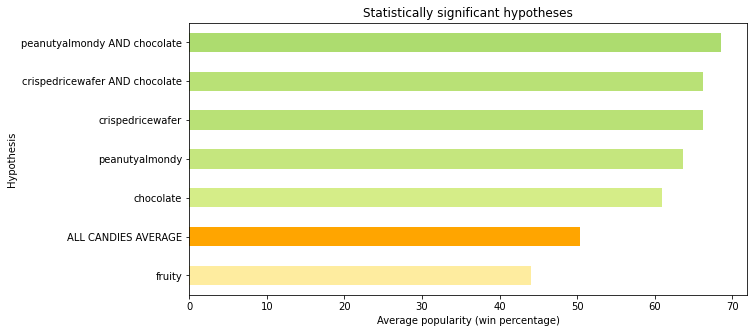

In [13]:
colors = [row['color'] for index, row in results_df.iterrows()]
results_df.plot(
    kind='barh',
    x='name',
    y='winpercent',
    color=colors,
    title='Statistically significant hypotheses',
    sort_columns=True,
    figsize = (10,5),
    legend=False
)
plt.xlabel('Average popularity (win percentage)')
plt.ylabel('Hypothesis')

plt.show()